### Flight delay prediction

In [7]:
# Pre-requisites
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Store the classifier models to save time
import joblib

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Classifiers from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Performance metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from scipy.stats import pointbiserialr

In [8]:
df=pd.read_csv('final1_train.csv')

In [9]:
df.isnull().sum()

Unnamed: 0                 0
FlightNumber               0
Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
ScheduledDepTime           0
ScheduledArrTime           0
ScheduledTravelTime        0
Origin                     0
Destination                0
Distance                   0
ActualArrivalTimeStamp     0
YearMonthDay_x             0
WeatherStationID           0
AirportID                  0
GroundHeight               0
StationHeight              0
BarometerHeight            0
Latitude                   0
Longitude                  0
TimeZone                   0
YearMonthDay_y             0
Time                       0
SkyConditions              0
Visibility                 0
DBT                        0
RelativeHumidityPercent    0
WindSpeed                  0
WindDirection              0
WindGustValue              0
StationPressure            0
HourlyPrecip               0
scheduled_arr_d_t          0
Arrdelay      

In [10]:
df.head()

,Unnamed: 0,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,...,Visibility,DBT,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,HourlyPrecip,scheduled_arr_d_t,Arrdelay
0,0,BOS_CLE_29089,2004,9,20,1,1000,1154,114,BOS,...,10SM,32.0,40.0,15.0,160,0.0,30.05,0.0,2004-09-20 11:54:00,0.0
1,1,CLE_ATL_44346,2004,11,19,5,1440,1634,114,CLE,...,10SM,21.0,74.0,5.0,0,0.0,30.06,0.0,2004-11-19 16:34:00,141.0
2,2,SNA_LAS_44378,2004,5,4,2,1800,1902,62,SNA,...,9SM,25.0,75.0,4.0,0,0.0,30.06,0.0,2004-05-04 19:02:00,0.0
3,3,CLT_TPA_51502,2004,7,6,2,1400,1533,93,CLT,...,4SM,25.0,92.0,0.0,0,0.0,29.98,0.0,2004-07-06 15:33:00,0.0
4,4,MSP_ORD_44884,2004,9,23,4,830,946,76,MSP,...,1.75SM,27.0,85.0,0.0,0,0.0,29.99,0.0,2004-09-23 09:46:00,0.0


#### Dropping ID columns,and other unnecessary columns

In [11]:
df=df.drop(['Unnamed: 0','FlightNumber','AirportID','WeatherStationID','scheduled_arr_d_t','ActualArrivalTimeStamp'],axis=1)

In [12]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,...,SkyConditions,Visibility,DBT,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,HourlyPrecip,Arrdelay
0,2004,9,20,1,1000,1154,114,BOS,CLE,563,...,FEW075 BKN090,10SM,32.0,40.0,15.0,160,0.0,30.05,0.0,0.0
1,2004,11,19,5,1440,1634,114,CLE,ATL,554,...,BKN028 OVC033,10SM,21.0,74.0,5.0,0,0.0,30.06,0.0,141.0
2,2004,5,4,2,1800,1902,62,SNA,LAS,226,...,FEW025 OVC032,9SM,25.0,75.0,4.0,0,0.0,30.06,0.0,0.0
3,2004,7,6,2,1400,1533,93,CLT,TPA,508,...,SCT015 BKN020 OVC028,4SM,25.0,92.0,0.0,0,0.0,29.98,0.0,0.0
4,2004,9,23,4,830,946,76,MSP,ORD,334,...,BKN013 OVC021,1.75SM,27.0,85.0,0.0,0,0.0,29.99,0.0,0.0


In [13]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ScheduledDepTime',
       'ScheduledArrTime', 'ScheduledTravelTime', 'Origin', 'Destination',
       'Distance', 'YearMonthDay_x', 'GroundHeight', 'StationHeight',
       'BarometerHeight', 'Latitude', 'Longitude', 'TimeZone',
       'YearMonthDay_y', 'Time', 'SkyConditions', 'Visibility', 'DBT',
       'RelativeHumidityPercent', 'WindSpeed', 'WindDirection',
       'WindGustValue', 'StationPressure', 'HourlyPrecip', 'Arrdelay'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     7861 non-null   int64  
 1   Month                    7861 non-null   int64  
 2   DayofMonth               7861 non-null   int64  
 3   DayOfWeek                7861 non-null   int64  
 4   ScheduledDepTime         7861 non-null   int64  
 5   ScheduledArrTime         7861 non-null   int64  
 6   ScheduledTravelTime      7861 non-null   int64  
 7   Origin                   7861 non-null   object 
 8   Destination              7861 non-null   object 
 9   Distance                 7861 non-null   int64  
 10  YearMonthDay_x           7861 non-null   object 
 11  GroundHeight             7861 non-null   int64  
 12  StationHeight            7861 non-null   int64  
 13  BarometerHeight          7861 non-null   int64  
 14  Latitude                

#### If Arrdelay is greater than 15 minutes, flights are delayed and labelled as 1.
#### If Arrdelay is leeser than 15 minutes, fights are not delayed and hence labelled as 2.

In [15]:
status = []

for value in df['Arrdelay']:
    if value > 15:
        status.append(1)
    else:
        status.append(2)
df['FlightDelayStatus'] = status 
    

In [16]:
df.FlightDelayStatus

0       2
1       1
2       2
3       2
4       2
       ..
7856    2
7857    2
7858    2
7859    2
7860    1
Name: FlightDelayStatus, Length: 7861, dtype: int64

In [17]:
df=df.drop(['Arrdelay'],axis=1)

In [18]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ScheduledDepTime',
       'ScheduledArrTime', 'ScheduledTravelTime', 'Origin', 'Destination',
       'Distance', 'YearMonthDay_x', 'GroundHeight', 'StationHeight',
       'BarometerHeight', 'Latitude', 'Longitude', 'TimeZone',
       'YearMonthDay_y', 'Time', 'SkyConditions', 'Visibility', 'DBT',
       'RelativeHumidityPercent', 'WindSpeed', 'WindDirection',
       'WindGustValue', 'StationPressure', 'HourlyPrecip',
       'FlightDelayStatus'],
      dtype='object')

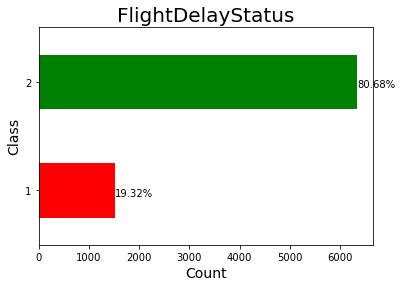

2    6342
1    1519
Name: FlightDelayStatus, dtype: int64


In [19]:
# Plotting the percentage of observations that fall under each class
ax = df["FlightDelayStatus"].value_counts().sort_values().plot(kind="barh", color=["r", "g"])
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
plt.title("FlightDelayStatus", fontsize=20)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Class", fontsize=14)
plt.show()
print(df["FlightDelayStatus"].value_counts())
fig = ax.get_figure()
fig.savefig("Img/05_01_ArrDel15_Class_Imbalance.png")

In [20]:
df.shape

(7861, 29)

In [21]:
df.select_dtypes(include=['object'])


,Origin,Destination,YearMonthDay_x,YearMonthDay_y,SkyConditions,Visibility
0,BOS,CLE,2004-09-20,2004-01-01,FEW075 BKN090,10SM
1,CLE,ATL,2004-11-19,2004-01-01,BKN028 OVC033,10SM
2,SNA,LAS,2004-05-04,2004-01-01,FEW025 OVC032,9SM
3,CLT,TPA,2004-07-06,2004-01-02,SCT015 BKN020 OVC028,4SM
4,MSP,ORD,2004-09-23,2004-01-02,BKN013 OVC021,1.75SM
...,...,...,...,...,...,...
7856,IAH,DEN,2004-05-27,2004-03-28,BKN070 OVC095,10SM
7857,EWR,MEM,2004-11-29,2004-03-28,CLR,10SM
7858,IAD,GSO,2004-05-11,2004-03-28,CLR,10SM
7859,SLC,GEG,2004-01-04,2004-03-28,BKN090,10SM


In [22]:
df=df.drop(['YearMonthDay_x','YearMonthDay_y'],axis=1)

In [23]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ScheduledDepTime',
       'ScheduledArrTime', 'ScheduledTravelTime', 'Origin', 'Destination',
       'Distance', 'GroundHeight', 'StationHeight', 'BarometerHeight',
       'Latitude', 'Longitude', 'TimeZone', 'Time', 'SkyConditions',
       'Visibility', 'DBT', 'RelativeHumidityPercent', 'WindSpeed',
       'WindDirection', 'WindGustValue', 'StationPressure', 'HourlyPrecip',
       'FlightDelayStatus'],
      dtype='object')

#### labelencoding categorical data

In [24]:
cols = ['Origin', 'Destination', 'SkyConditions', 'Visibility']
#
# Encode labels of multiple columns at once
#
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
df.head()

,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,...,SkyConditions,Visibility,DBT,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,HourlyPrecip,FlightDelayStatus
0,2004,9,20,1,1000,1154,114,27,43,563,...,630,6,32.0,40.0,15.0,160,0.0,30.05,0.0,2
1,2004,11,19,5,1440,1634,114,45,13,554,...,112,6,21.0,74.0,5.0,0,0.0,30.06,0.0,1
2,2004,5,4,2,1800,1902,62,205,115,226,...,399,16,25.0,75.0,4.0,0,0.0,30.06,0.0,2
3,2004,7,6,2,1400,1533,93,47,207,508,...,762,11,25.0,92.0,0.0,0,0.0,29.98,0.0,2
4,2004,9,23,4,830,946,76,153,155,334,...,70,5,27.0,85.0,0.0,0,0.0,29.99,0.0,2


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     7861 non-null   int64  
 1   Month                    7861 non-null   int64  
 2   DayofMonth               7861 non-null   int64  
 3   DayOfWeek                7861 non-null   int64  
 4   ScheduledDepTime         7861 non-null   int64  
 5   ScheduledArrTime         7861 non-null   int64  
 6   ScheduledTravelTime      7861 non-null   int64  
 7   Origin                   7861 non-null   int32  
 8   Destination              7861 non-null   int32  
 9   Distance                 7861 non-null   int64  
 10  GroundHeight             7861 non-null   int64  
 11  StationHeight            7861 non-null   int64  
 12  BarometerHeight          7861 non-null   int64  
 13  Latitude                 7861 non-null   float64
 14  Longitude               

In [26]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,...,SkyConditions,Visibility,DBT,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,HourlyPrecip,FlightDelayStatus
count,7861.0,7861.00000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,...,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000
mean,2004.0,7.12085,15.441292,3.960946,1198.225417,1412.232922,129.623839,110.092355,102.350464,743.764025,...,336.000763,6.151507,46.462918,43.526619,6.872281,164.722046,3.979392,29.779902,0.000069,1.806768
std,0.0,2.82233,9.049019,1.980921,354.923067,369.739052,63.272072,62.433381,59.912529,522.629372,...,197.845886,1.273659,15.548792,26.128947,5.100114,116.039783,8.828625,1.156824,0.002029,0.394859
min,2004.0,1.00000,1.000000,1.000000,215.000000,553.000000,61.000000,0.000000,0.000000,69.000000,...,0.000000,0.000000,-8.000000,3.000000,0.000000,0.000000,0.000000,25.790000,0.000000,1.000000
25%,2004.0,5.00000,7.000000,2.000000,900.000000,1111.000000,83.000000,58.000000,52.000000,368.000000,...,243.000000,6.000000,36.000000,21.000000,4.000000,40.000000,0.000000,30.010000,0.000000,2.000000
50%,2004.0,7.00000,15.000000,4.000000,1215.000000,1430.000000,112.000000,116.000000,101.000000,595.000000,...,243.000000,6.000000,46.000000,38.000000,6.000000,180.000000,0.000000,30.130000,0.000000,2.000000
75%,2004.0,9.00000,23.000000,6.000000,1518.000000,1728.000000,155.000000,162.000000,155.000000,951.000000,...,243.000000,6.000000,57.000000,64.000000,9.000000,260.000000,0.000000,30.240000,0.000000,2.000000
max,2004.0,11.00000,31.000000,7.000000,1800.000000,2300.000000,562.000000,222.000000,214.000000,4962.000000,...,923.000000,16.000000,86.000000,100.000000,33.000000,360.000000,42.000000,30.590000,0.100000,2.000000


In [27]:
df1=pd.DataFrame(df)

In [28]:
df1.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ScheduledDepTime',
       'ScheduledArrTime', 'ScheduledTravelTime', 'Origin', 'Destination',
       'Distance', 'GroundHeight', 'StationHeight', 'BarometerHeight',
       'Latitude', 'Longitude', 'TimeZone', 'Time', 'SkyConditions',
       'Visibility', 'DBT', 'RelativeHumidityPercent', 'WindSpeed',
       'WindDirection', 'WindGustValue', 'StationPressure', 'HourlyPrecip',
       'FlightDelayStatus'],
      dtype='object')

In [29]:
df1

,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,...,SkyConditions,Visibility,DBT,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,HourlyPrecip,FlightDelayStatus
0,2004,9,20,1,1000,1154,114,27,43,563,...,630,6,32.0,40.0,15.0,160,0.0,30.05,0.0,2
1,2004,11,19,5,1440,1634,114,45,13,554,...,112,6,21.0,74.0,5.0,0,0.0,30.06,0.0,1
2,2004,5,4,2,1800,1902,62,205,115,226,...,399,16,25.0,75.0,4.0,0,0.0,30.06,0.0,2
3,2004,7,6,2,1400,1533,93,47,207,508,...,762,11,25.0,92.0,0.0,0,0.0,29.98,0.0,2
4,2004,9,23,4,830,946,76,153,155,334,...,70,5,27.0,85.0,0.0,0,0.0,29.99,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7856,2004,5,27,4,735,900,145,107,57,861,...,217,6,39.0,93.0,4.0,220,0.0,26.29,0.0,2
7857,2004,11,29,1,1155,1354,179,72,132,946,...,243,6,40.0,86.0,10.0,270,0.0,26.32,0.0,2
7858,2004,5,11,2,1250,1405,75,106,87,239,...,243,6,47.0,63.0,9.0,280,0.0,26.34,0.0,2
7859,2004,1,4,7,1130,1214,104,203,80,546,...,232,6,53.0,31.0,18.0,340,0.0,26.36,0.0,2


#### Obtaining correlation between variables

In [30]:
# get continuous and dichotomous data
categorical = ["Year", "DayofMonth", "Month", "DayOfWeek", "WindSpeed","WindDirection","Origin", "Destination", "Time", "TimeZone","FlightDelayStatus"]
numeric = [ "ScheduledArrTime","ScheduledDepTime","DBT", "RelativeHumidityPercent", "WindGustValue", "StationPressure", "HourlyPrecip", "GroundHeight", "StationHeight", "BarometerHeight","Latitude","Longitude"]
target = df["FlightDelayStatus"]

# pbc of first question
pbc = list()
for col in numeric:
    ans = pointbiserialr(df[col], target)
    pbc.append([col, ans[0], ans[1]])
    
pbc_corr = pd.DataFrame(pbc, columns=["Feature", "CorrCoeff", "pValue"]).sort_values(by="CorrCoeff", ascending=False).reset_index(drop=True)
pbc_corr

,Feature,CorrCoeff,pValue
0,RelativeHumidityPercent,0.007451,5.089020e-01
1,StationPressure,0.002323,8.368277e-01
2,Longitude,-0.000932,9.341201e-01
3,Latitude,-0.001918,8.649583e-01
4,GroundHeight,-0.002032,8.570307e-01
5,BarometerHeight,-0.002032,8.570307e-01
6,StationHeight,-0.002032,8.570307e-01
7,WindGustValue,-0.003077,7.850478e-01
8,DBT,-0.016595,1.412317e-01
9,HourlyPrecip,-0.018365,1.034949e-01


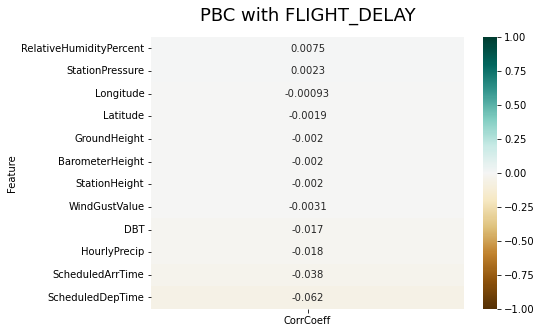

In [31]:
plt.figure(figsize=(7, 5))
pbc_corr = pbc_corr.set_index("Feature")
heatmap = sns.heatmap(pbc_corr[["CorrCoeff"]].sort_values(by="CorrCoeff", ascending=False), vmin=-1, vmax=1, annot=True, cmap="BrBG")
heatmap.set_title("PBC with FLIGHT_DELAY", fontdict={"fontsize":18}, pad=16);
plt.savefig("Img/05_02_PBC_ArrDel15.png")
del pbc_corr

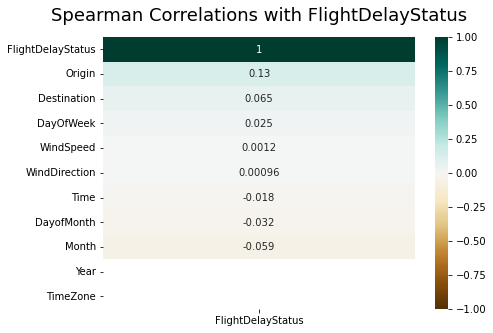

In [32]:
plt.figure(figsize=(7, 5))
heatmap = sns.heatmap(df[categorical].corr(method="spearman")[["FlightDelayStatus"]].sort_values(by="FlightDelayStatus", ascending=False), vmin=-1, vmax=1, annot=True, cmap="BrBG")
heatmap.set_title("Spearman Correlations with FlightDelayStatus", fontdict={"fontsize":18}, pad=16)
plt.savefig("Img/05_03_Spearman_ArrDel15.png")
del heatmap

#### Feature selection

In [33]:
X = df.loc[:, df.columns != "FlightDelayStatus"]
y = np.array(df.loc[:, df.columns == "FlightDelayStatus"]["FlightDelayStatus"])

model = RandomForestClassifier(n_estimators=100,
                       criterion="entropy", random_state=42, n_jobs=-1)

model.fit(X, y)
importances = model.feature_importances_
importances

array([0.        , 0.04707203, 0.07840076, 0.04073344, 0.06900353,
       0.06932013, 0.06644611, 0.07807185, 0.06627971, 0.07096252,
       0.00229659, 0.00217708, 0.00214073, 0.00959493, 0.00935747,
       0.        , 0.06515355, 0.03222331, 0.00455966, 0.05370358,
       0.05906635, 0.0422356 , 0.04971197, 0.01554424, 0.0651499 ,
       0.00079493])

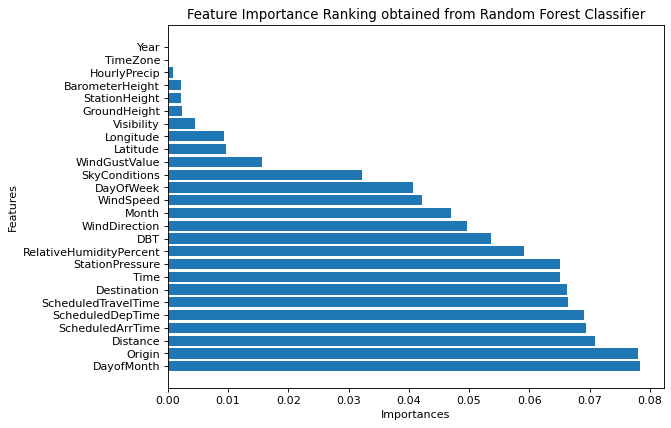

In [34]:
importances = pd.DataFrame({
    "Feature": list(X.columns),
    "Importance": model.feature_importances_
})
importances = importances.sort_values(by="Importance", ascending=False)
importances = importances.set_index("Feature")
importances
plt.figure(figsize=(8, 6), dpi=80)
plt.barh(importances.index, importances.Importance)
plt.title("Feature Importance Ranking obtained from Random Forest Classifier", fontsize=12)
plt.xlabel("Importances")
plt.ylabel("Features")
plt.savefig("Img/05_04_Feature_Importances_RFC_fin.png")
del importances
del model
del X
del y

In [35]:
df1.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ScheduledDepTime',
       'ScheduledArrTime', 'ScheduledTravelTime', 'Origin', 'Destination',
       'Distance', 'GroundHeight', 'StationHeight', 'BarometerHeight',
       'Latitude', 'Longitude', 'TimeZone', 'Time', 'SkyConditions',
       'Visibility', 'DBT', 'RelativeHumidityPercent', 'WindSpeed',
       'WindDirection', 'WindGustValue', 'StationPressure', 'HourlyPrecip',
       'FlightDelayStatus'],
      dtype='object')

<AxesSubplot:>

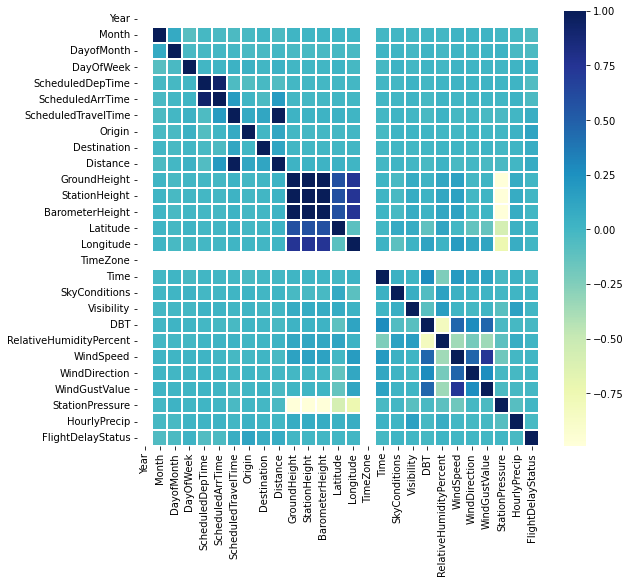

In [36]:
corrmat = df.corr()

f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)


In [37]:
# Encode the names of the 15 airports which are strings into a number range: 0 - 14
labelEncoder = LabelEncoder()
df["Origin"] = labelEncoder.fit_transform(df["Origin"])
df["Destination"] = labelEncoder.fit_transform(df["Destination"])
features = df.loc[:, df.columns != "FlightDelayStatus"]
labels = np.asarray(df["FlightDelayStatus"])
print(features.columns)

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ScheduledDepTime',
       'ScheduledArrTime', 'ScheduledTravelTime', 'Origin', 'Destination',
       'Distance', 'GroundHeight', 'StationHeight', 'BarometerHeight',
       'Latitude', 'Longitude', 'TimeZone', 'Time', 'SkyConditions',
       'Visibility', 'DBT', 'RelativeHumidityPercent', 'WindSpeed',
       'WindDirection', 'WindGustValue', 'StationPressure', 'HourlyPrecip'],
      dtype='object')


In [38]:
# Number of samples/observations/rows is greater than 100,000
print(f"\nDataset shape: {df.shape}")
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.20, random_state=42)
print(f"features_train shape: {features_train.shape} | features_test shape: {features_test.shape}")
print(f"labels_train shape: {labels_train.shape} | labels_test shape: {labels_test.shape}")
# print(f"{features_train.shape[1]} Features: {features_train.columns.to_list()}")
# df1.to_csv("Data/flight_and_weather_encoded.csv")


Dataset shape: (7861, 27)
features_train shape: (6288, 26) | features_test shape: (1573, 26)
labels_train shape: (6288,) | labels_test shape: (1573,)


## Handling imbalance

#### Target column is imbalanced, henced undersampled and fed to model

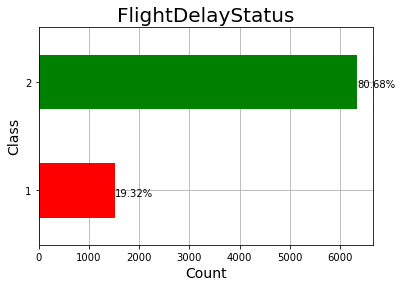

2    6342
1    1519
Name: FlightDelayStatus, dtype: int64


In [39]:
# Plotting the percentage of observations that fall under each class
ax = df["FlightDelayStatus"].value_counts().sort_values().plot(kind="barh", color=["r", "g"])
ax.set_axisbelow(True)
ax.grid()
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
plt.title("FlightDelayStatus", fontsize=20)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Class", fontsize=14)
plt.show()
print(df["FlightDelayStatus"].value_counts())
fig = ax.get_figure()
fig.savefig("Img/06_01_Dataset_ArrDel15_Class_Imbalance.png")

### Random Undersampling

In [40]:
# Imbalanced dataset helpers
from imblearn.under_sampling import RandomUnderSampler

In [41]:
rus = RandomUnderSampler(random_state=42)
features_train, labels_train = rus.fit_resample(features_train, labels_train)

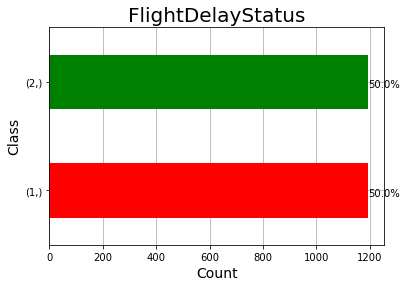

1    1194
2    1194
dtype: int64


In [42]:
# Plotting the percentage of observations that fall under each class
ax = pd.DataFrame(labels_train).value_counts().sort_values().plot(kind="barh", color=["r", "g"])
ax.set_axisbelow(True)
ax.grid()
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
plt.title("FlightDelayStatus", fontsize=20)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Class", fontsize=14)
plt.show()
print(pd.DataFrame(labels_train).value_counts())
fig = ax.get_figure()
fig.savefig("Img/07_03_RandomUnderSampling_Training_FlightDelayStatus_Class.png")

#### Model building

              precision    recall  f1-score   support

           1       0.27      0.57      0.36       325
           2       0.84      0.59      0.69      1248

    accuracy                           0.59      1573
   macro avg       0.55      0.58      0.53      1573
weighted avg       0.72      0.59      0.62      1573



C:\Users\vidya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


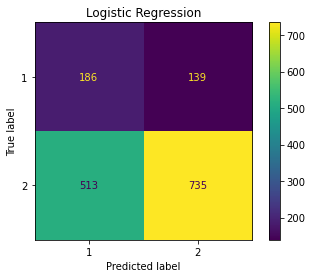

In [43]:
model = LogisticRegression(n_jobs=-1)
model.fit(features_train, labels_train)
#joblib.dump(model, "./RandomUnderSampling/LogisticRegression.joblib")
#model = joblib.load("./RandomUnderSampling/LogisticRegression.joblib")
model_pred = model.predict(features_test)
# print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Logistic Regression")
print(conf_mat_plot)
plt.savefig("Img/07_04_RandomUnderSampling_LR_Confusion_Matrix")
del model
del model_pred

[[197 128]
 [536 712]]
              precision    recall  f1-score   support

           1       0.27      0.61      0.37       325
           2       0.85      0.57      0.68      1248

    accuracy                           0.58      1573
   macro avg       0.56      0.59      0.53      1573
weighted avg       0.73      0.58      0.62      1573



C:\Users\vidya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


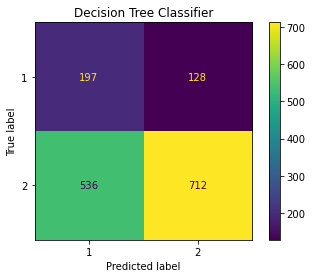

In [44]:
model = DecisionTreeClassifier()
model.fit(features_train, labels_train)
# joblib.dump(model, "./RandomUnderSampling/DecisionTreeClassifier.joblib")
#model = joblib.load("./RandomUnderSampling/DecisionTreeClassifier.joblib")
model_pred = model.predict(features_test)
print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Decision Tree Classifier")
print(conf_mat_plot)
plt.savefig("Img/07_05_RandomUnderSampling_DTC_Confusion_Matrix")
del model
del model_pred

[[211 114]
 [478 770]]
              precision    recall  f1-score   support

           1       0.31      0.65      0.42       325
           2       0.87      0.62      0.72      1248

    accuracy                           0.62      1573
   macro avg       0.59      0.63      0.57      1573
weighted avg       0.75      0.62      0.66      1573



C:\Users\vidya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


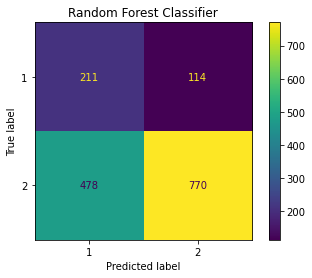

In [45]:
model = RandomForestClassifier(n_jobs=-1)
model.fit(features_train, labels_train)
# joblib.dump(model, "./RandomUnderSampling/RandomForestClassifier.joblib")
#model = joblib.load("./RandomUnderSampling/RandomForestClassifier.joblib")
model_pred = model.predict(features_test)
print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Random Forest Classifier")
print(conf_mat_plot)
plt.savefig("Img/07_07_RandomUnderSampling_RFC_Confusion_Matrix")
del model
del model_pred

#### Random sampling did not increase the accuracy and f1 hence trying other methods to handle imbalance

# Random Over Sampling to Handle Imbalance

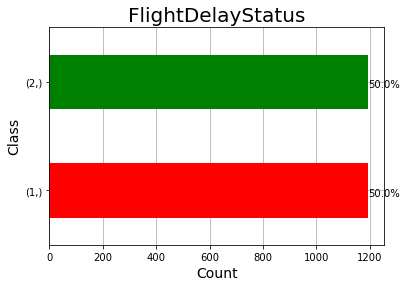

1    1194
2    1194
dtype: int64


In [46]:
# Plotting the percentage of observations that fall under each class
ax = pd.DataFrame(labels_train).value_counts().sort_values().plot(kind="barh", color=["r", "g"])
ax.set_axisbelow(True)
ax.grid()
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
plt.title("FlightDelayStatus", fontsize=20)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Class", fontsize=14)
plt.show()
print(pd.DataFrame(labels_train).value_counts())
fig = ax.get_figure()
fig.savefig("Img/08_02_Training_ArrDel15_Class_Imbalance.png")

In [47]:
# Imbalanced dataset helpers
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
features_train, labels_train = ros.fit_resample(features_train, labels_train)

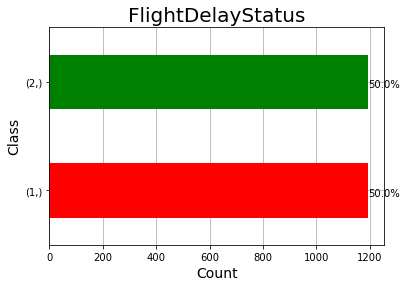

1    1194
2    1194
dtype: int64


In [48]:
# Plotting the percentage of observations that fall under each class
ax = pd.DataFrame(labels_train).value_counts().sort_values().plot(kind="barh", color=["r", "g"])
ax.set_axisbelow(True)
ax.grid()
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
plt.title("FlightDelayStatus", fontsize=20)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Class", fontsize=14)
plt.show()
print(pd.DataFrame(labels_train).value_counts())
fig = ax.get_figure()
fig.savefig("Img/08_03_RandomOverSampling_Training_ArrDel15_Class.png")

### Building model for prediction

[[186 139]
 [513 735]]
              precision    recall  f1-score   support

           1       0.27      0.57      0.36       325
           2       0.84      0.59      0.69      1248

    accuracy                           0.59      1573
   macro avg       0.55      0.58      0.53      1573
weighted avg       0.72      0.59      0.62      1573



C:\Users\vidya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


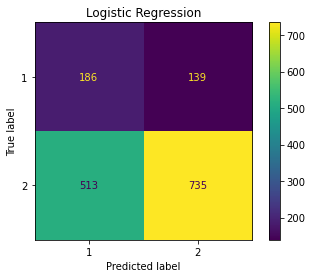

In [49]:
model = LogisticRegression(n_jobs=-1)
model.fit(features_train, labels_train)
# joblib.dump(model, "./RandomOverSampling/LogisticRegression.joblib")
#model = joblib.load("./RandomOverSampling/LogisticRegression.joblib")
model_pred = model.predict(features_test)
print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Logistic Regression")
print(conf_mat_plot)
plt.savefig("Img/08_04_RandomOverSampling_LR_Confusion_Matrix")
del model
del model_pred

[[203 122]
 [546 702]]
              precision    recall  f1-score   support

           1       0.27      0.62      0.38       325
           2       0.85      0.56      0.68      1248

    accuracy                           0.58      1573
   macro avg       0.56      0.59      0.53      1573
weighted avg       0.73      0.58      0.62      1573



C:\Users\vidya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


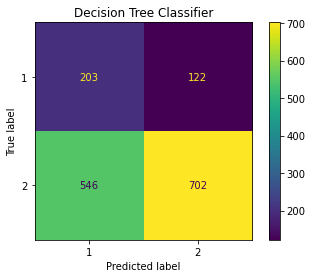

In [50]:
model = DecisionTreeClassifier()
model.fit(features_train, labels_train)
# joblib.dump(model, "./RandomOverSampling/DecisionTreeClassifier.joblib")
#model = joblib.load("./RandomOverSampling/DecisionTreeClassifier.joblib")
model_pred = model.predict(features_test)
print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Decision Tree Classifier")
print(conf_mat_plot)
plt.savefig("Img/08_05_RandomOverSampling_DTC_Confusion_Matrix")
del model
del model_pred

              precision    recall  f1-score   support

           1       0.30      0.64      0.41       325
           2       0.87      0.61      0.72      1248

    accuracy                           0.62      1573
   macro avg       0.58      0.62      0.56      1573
weighted avg       0.75      0.62      0.65      1573



C:\Users\vidya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([2, 1, 2, ..., 2, 2, 2], dtype=int64)

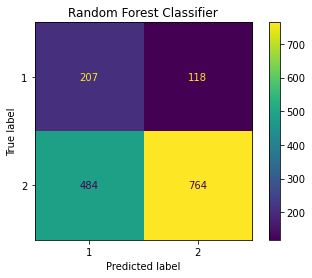

In [51]:
model = RandomForestClassifier(n_jobs=-1)
model.fit(features_train, labels_train)
# joblib.dump(model, "./RandomOverSampling/RandomForestClassifier.joblib")
#model = joblib.load("./RandomOverSampling/RandomForestClassifier.joblib")
model_pred = model.predict(features_test)
# print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Random Forest Classifier")
print(conf_mat_plot)
plt.savefig("Img/08_07_RandomOverSampling_RFC_Confusion_Matrix")
model
model_pred

### RandomForestClassifier has highest accuracy and hence is chosen for prediction on test data

In [52]:
model

RandomForestClassifier(n_jobs=-1)

In [53]:
test_data=pd.read_csv('test_data_comp.csv')

In [54]:
test_data.columns

Index(['Unnamed: 0', 'FlightNumber', 'Year', 'Month', 'DayofMonth',
       'DayOfWeek', 'ScheduledDepTime', 'ScheduledArrTime',
       'ScheduledTravelTime', 'Origin', 'Destination', 'Distance',
       'GroundHeight', 'StationHeight', 'BarometerHeight', 'Latitude',
       'Longitude', 'TimeZone', 'Time', 'SkyConditions', 'Visibility', 'DBT',
       'RelativeHumidityPercent', 'WindSpeed', 'WindDirection',
       'WindGustValue', 'StationPressure', 'HourlyPrecip'],
      dtype='object')

In [55]:
testdata1=test_data.drop('FlightNumber',axis=1)

In [56]:
testdata1.isnull().sum()

Unnamed: 0                 0
Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
ScheduledDepTime           0
ScheduledArrTime           0
ScheduledTravelTime        0
Origin                     0
Destination                0
Distance                   0
GroundHeight               0
StationHeight              0
BarometerHeight            0
Latitude                   0
Longitude                  0
TimeZone                   0
Time                       0
SkyConditions              0
Visibility                 0
DBT                        0
RelativeHumidityPercent    0
WindSpeed                  0
WindDirection              0
WindGustValue              0
StationPressure            0
HourlyPrecip               0
dtype: int64

In [57]:
testdata1=testdata1.drop('Unnamed: 0',axis=1)

In [58]:
testdata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6566 entries, 0 to 6565
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     6566 non-null   int64  
 1   Month                    6566 non-null   int64  
 2   DayofMonth               6566 non-null   int64  
 3   DayOfWeek                6566 non-null   int64  
 4   ScheduledDepTime         6566 non-null   int64  
 5   ScheduledArrTime         6566 non-null   int64  
 6   ScheduledTravelTime      6566 non-null   int64  
 7   Origin                   6566 non-null   int64  
 8   Destination              6566 non-null   int64  
 9   Distance                 6566 non-null   int64  
 10  GroundHeight             6566 non-null   int64  
 11  StationHeight            6566 non-null   int64  
 12  BarometerHeight          6566 non-null   int64  
 13  Latitude                 6566 non-null   float64
 14  Longitude               

In [59]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2388 entries, 0 to 2387
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     2388 non-null   int64  
 1   Month                    2388 non-null   int64  
 2   DayofMonth               2388 non-null   int64  
 3   DayOfWeek                2388 non-null   int64  
 4   ScheduledDepTime         2388 non-null   int64  
 5   ScheduledArrTime         2388 non-null   int64  
 6   ScheduledTravelTime      2388 non-null   int64  
 7   Origin                   2388 non-null   int64  
 8   Destination              2388 non-null   int64  
 9   Distance                 2388 non-null   int64  
 10  GroundHeight             2388 non-null   int64  
 11  StationHeight            2388 non-null   int64  
 12  BarometerHeight          2388 non-null   int64  
 13  Latitude                 2388 non-null   float64
 14  Longitude               

In [60]:
model

RandomForestClassifier(n_jobs=-1)

In [61]:
testdata1.head()

,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,...,Time,SkyConditions,Visibility,DBT,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,HourlyPrecip
0,2005,9,12,1,1516,1756,100,57,205,616,...,1049,782,6,30.0,64.0,8.0,270,0.0,30.06,0.0
1,2005,11,14,1,1300,1415,75,174,63,278,...,1149,151,6,34.0,59.0,0.0,0,0.0,30.05,0.0
2,2005,9,28,3,1040,1144,64,97,83,239,...,1249,546,6,34.0,54.0,8.0,260,0.0,30.02,0.0
3,2005,11,18,5,1120,1302,102,181,48,515,...,1349,1027,15,32.0,69.0,10.0,260,0.0,30.02,0.0
4,2005,7,5,2,630,733,63,184,109,155,...,1449,408,6,28.0,56.0,6.0,0,0.0,30.01,0.0


In [62]:
FlightDelayStatus=model.predict(testdata1)

In [63]:
FlightDelayStatus

array([1, 1, 2, ..., 2, 2, 2], dtype=int64)

In [64]:
def unique(FlightDelayStatus):
    x = np.array(FlightDelayStatus)
    print(np.unique(x))
unique(FlightDelayStatus)

[1 2]


In [65]:
final1= pd.DataFrame({'FlightNumber': test_data['FlightNumber'], 'FlightDelayStatus': FlightDelayStatus})

In [66]:
final1.to_csv('Vidyashree_v(2).csv',index=False)